# EE4211 Group 9 Question 2

2.1 In this part, you will build a model to forecast the hourly carpark availability in the future
(aggregated across all carparks instead of looking at each carpark individually). Can you
explain why you may want to forecast the carpark availability in the future? Who would
find this information valuable? What can you do if you have a good forecasting model?


This would help commuters easily identify available carparks they can use and easily plan their route and schedule ahead of time. At the same time, by being able to forecast availability of carparks, developers can identify hotspots where there may often be high usage of car parks and thus a good location to build more lots or carparks to cater to the high demand. In contrast, they can also identify potential spots where space which is a constraint in SG, can be saved by reducing the number of lots or carparks that don't have high usage forecasted. Event organisers can also plan their events around where there would be high percentage of free carparks through analysing this forecasting model.

In [1]:
import requests
import json
import datetime
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [5]:
def get_data(num_days, month, month_data, minutes, second_str, file_title):
    for day in range(1, num_days + 1):
        day_str = str(day)
        for hour in range(0, 24):
            hour_str = str(hour)
            site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minutes.zfill(2)}%3A{second_str.zfill(2)}'
#             print(site)
            response_API = requests.get(site)
            data = response_API.text
            data = json.loads(data)
            if(not "items" in data):
                continue
            timestamp = data["items"][0]["timestamp"]
            print(timestamp)

            data = data["items"][0]["carpark_data"]
            
            with open(file_title, 'r') as fp:
                json_file = json.load(fp)
                
            json_file.append(data)
            
            with open(file_title, 'w') as fp:
                json.dump(data, fp)
            dt = (pd.read_json(file_title))
            for heading in ("total_lots","lot_type","lots_available"):
                dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
            dt = dt.drop(["carpark_info"], axis=1)
            month_data = month_data.append(dt)

# only to be run once
# to replicate the code and store data in a file, uncomment the line below
    csv_title = month + "_data_Q2.csv"
    month_data.to_csv(csv_title, index = False)
    month_data

In [8]:
year = "2022"
second_str = "50"
num_days = 31
month = "7"
minutes = "59"

file_title = "EE4211_data_" + month + ".json"

jul_data = pd.DataFrame()

get_data(num_days, month, jul_data, minutes, second_str, file_title)

2022-07-01T00:59:27+08:00
2022-07-01T02:59:27+08:00
2022-07-01T03:59:27+08:00
2022-07-01T06:59:27+08:00
2022-07-01T08:58:27+08:00
2022-07-01T10:59:27+08:00
2022-07-01T11:59:26+08:00
2022-07-01T12:58:27+08:00
2022-07-01T16:59:27+08:00
2022-07-01T17:59:27+08:00
2022-07-01T18:58:27+08:00
2022-07-01T19:59:27+08:00
2022-07-01T20:59:27+08:00
2022-07-01T21:59:27+08:00
2022-07-01T23:59:27+08:00
2022-07-02T00:59:27+08:00
2022-07-02T02:59:27+08:00
2022-07-02T04:59:27+08:00
2022-07-02T10:59:27+08:00
2022-07-02T11:59:27+08:00
2022-07-02T15:59:27+08:00
2022-07-02T16:59:27+08:00
2022-07-02T18:59:26+08:00
2022-07-03T02:59:27+08:00
2022-07-03T05:59:27+08:00
2022-07-03T06:59:27+08:00
2022-07-03T07:59:27+08:00
2022-07-03T09:59:26+08:00
2022-07-03T10:59:27+08:00
2022-07-03T11:59:27+08:00
2022-07-03T16:59:27+08:00
2022-07-03T23:59:27+08:00
2022-07-04T02:59:27+08:00
2022-07-04T04:59:27+08:00
2022-07-04T05:59:27+08:00
2022-07-04T06:59:27+08:00
2022-07-04T08:59:27+08:00
2022-07-04T13:59:27+08:00
2022-07-04T1

2022-07-16T15:59:27+08:00
2022-07-16T16:59:27+08:00
2022-07-16T17:59:27+08:00
2022-07-16T18:59:27+08:00
2022-07-16T19:59:27+08:00
2022-07-16T20:59:27+08:00
2022-07-16T21:59:27+08:00
2022-07-16T22:59:27+08:00
2022-07-16T23:59:27+08:00
2022-07-17T00:59:27+08:00
2022-07-17T01:59:27+08:00
2022-07-17T02:59:27+08:00
2022-07-17T03:59:27+08:00
2022-07-17T04:59:27+08:00
2022-07-17T05:59:27+08:00
2022-07-17T06:59:27+08:00
2022-07-17T07:59:27+08:00
2022-07-17T08:59:27+08:00
2022-07-17T09:59:27+08:00
2022-07-17T10:59:27+08:00
2022-07-17T11:59:27+08:00
2022-07-17T12:59:27+08:00
2022-07-17T13:59:27+08:00
2022-07-17T14:59:27+08:00
2022-07-17T15:59:27+08:00
2022-07-17T16:59:27+08:00
2022-07-17T17:59:27+08:00
2022-07-17T18:59:27+08:00
2022-07-17T19:59:27+08:00
2022-07-17T20:59:27+08:00
2022-07-17T21:59:27+08:00
2022-07-17T22:59:27+08:00
2022-07-17T23:59:27+08:00
2022-07-18T00:59:27+08:00
2022-07-18T01:59:27+08:00
2022-07-18T02:59:27+08:00
2022-07-18T03:59:27+08:00
2022-07-18T04:59:27+08:00
2022-07-18T0

2022-07-29T21:59:27+08:00
2022-07-29T22:59:27+08:00
2022-07-29T23:59:27+08:00
2022-07-30T00:59:27+08:00
2022-07-30T01:59:27+08:00
2022-07-30T02:59:28+08:00
2022-07-30T03:59:27+08:00
2022-07-30T04:59:27+08:00
2022-07-30T05:59:27+08:00
2022-07-30T06:59:26+08:00
2022-07-30T07:59:27+08:00
2022-07-30T08:59:27+08:00
2022-07-30T09:59:27+08:00
2022-07-30T10:59:27+08:00
2022-07-30T11:59:26+08:00
2022-07-30T12:59:27+08:00
2022-07-30T13:59:26+08:00
2022-07-30T14:59:27+08:00
2022-07-30T15:59:27+08:00
2022-07-30T16:59:27+08:00
2022-07-30T17:59:27+08:00
2022-07-30T18:59:27+08:00
2022-07-30T19:59:27+08:00
2022-07-30T20:59:27+08:00
2022-07-30T21:59:27+08:00
2022-07-30T22:59:27+08:00
2022-07-30T23:59:27+08:00
2022-07-31T00:59:27+08:00
2022-07-31T01:59:27+08:00
2022-07-31T02:59:27+08:00
2022-07-31T03:59:27+08:00
2022-07-31T04:59:27+08:00
2022-07-31T06:59:27+08:00
2022-07-31T07:59:27+08:00
2022-07-31T08:59:27+08:00
2022-07-31T09:59:27+08:00
2022-07-31T10:59:26+08:00
2022-07-31T11:59:27+08:00
2022-07-31T1

In [9]:
year = "2022"
second_str = "59"
num_days = 31
month = "8"
minutes = "30"

file_title = "EE4211_data_" + month + ".json"

aug_data = pd.DataFrame()

get_data(num_days, month, aug_data, minutes, second_str, file_title)

2022-08-01T00:30:27+08:00
2022-08-01T01:30:27+08:00
2022-08-01T02:30:27+08:00
2022-08-01T03:30:27+08:00
2022-08-01T04:30:26+08:00
2022-08-01T05:30:27+08:00
2022-08-01T06:30:27+08:00
2022-08-01T07:30:30+08:00
2022-08-01T08:30:27+08:00
2022-08-01T09:30:27+08:00
2022-08-01T10:30:27+08:00
2022-08-01T11:30:27+08:00
2022-08-01T12:30:27+08:00
2022-08-01T13:30:27+08:00
2022-08-01T14:30:27+08:00
2022-08-01T15:30:27+08:00
2022-08-01T16:30:27+08:00
2022-08-01T17:30:27+08:00
2022-08-01T18:30:27+08:00
2022-08-01T19:30:27+08:00
2022-08-01T20:30:27+08:00
2022-08-01T21:30:27+08:00
2022-08-01T22:30:27+08:00
2022-08-01T23:30:27+08:00
2022-08-02T00:30:27+08:00
2022-08-02T01:30:27+08:00
2022-08-02T02:30:27+08:00
2022-08-02T03:30:27+08:00
2022-08-02T04:30:27+08:00
2022-08-02T05:30:27+08:00
2022-08-02T06:30:27+08:00
2022-08-02T07:30:27+08:00
2022-08-02T08:30:27+08:00
2022-08-02T09:30:27+08:00
2022-08-02T11:30:27+08:00
2022-08-02T12:30:27+08:00
2022-08-02T13:30:27+08:00
2022-08-02T14:30:27+08:00
2022-08-02T1

2022-08-18T11:30:27+08:00
2022-08-18T12:30:27+08:00
2022-08-18T13:30:27+08:00
2022-08-18T14:30:27+08:00
2022-08-18T15:30:27+08:00
2022-08-18T16:30:26+08:00
2022-08-18T17:30:27+08:00
2022-08-18T18:30:27+08:00
2022-08-18T19:30:27+08:00
2022-08-18T20:30:27+08:00
2022-08-18T21:30:27+08:00
2022-08-18T22:30:27+08:00
2022-08-18T23:30:27+08:00
2022-08-19T00:30:27+08:00
2022-08-19T01:30:27+08:00
2022-08-19T02:30:27+08:00
2022-08-19T03:30:27+08:00
2022-08-19T04:30:27+08:00
2022-08-19T05:30:27+08:00
2022-08-19T06:30:27+08:00
2022-08-19T07:30:27+08:00
2022-08-19T08:30:27+08:00
2022-08-19T09:30:27+08:00
2022-08-19T10:30:26+08:00
2022-08-19T11:30:27+08:00
2022-08-19T12:30:27+08:00
2022-08-19T13:30:26+08:00
2022-08-19T14:30:27+08:00
2022-08-19T15:30:27+08:00
2022-08-19T16:30:27+08:00
2022-08-19T17:30:27+08:00
2022-08-19T18:30:27+08:00
2022-08-19T19:30:27+08:00
2022-08-19T20:30:27+08:00
2022-08-19T21:30:27+08:00
2022-08-19T22:30:27+08:00
2022-08-19T23:30:27+08:00
2022-08-20T00:30:27+08:00
2022-08-20T0

2022-08-31T16:30:27+08:00
2022-08-31T17:30:27+08:00
2022-08-31T18:30:27+08:00
2022-08-31T19:30:27+08:00
2022-08-31T20:30:27+08:00
2022-08-31T21:30:27+08:00
2022-08-31T22:30:27+08:00
2022-08-31T23:30:27+08:00


In [2]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Sample that just imports from json
with open('EE4211_data_7.json', 'r') as f:
    jul_data = json.load(f)
jul_data

In [ ]:
# Sample that just imports from json
with open('EE4211_Q2_AugData.json', 'r') as f:
    aug_data = json.load(f)
aug_data

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 100)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

## Question 2.3

**Build a support vector regressor (SVR) model to forecast the hourly carpark availability for the month of August.**

Training data: July 2022
Test data: August 2022

The target is the hourly carpark availability percentage and you will have to decide what features you want to use.

### Data Cleaning

In [3]:
jul_data_df = pd.read_csv('7_data_Q2.csv')
jul_data_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-06-30T23:00:59,105,C,56
1,HLM,2022-07-01T00:58:55,583,C,482
2,RHM,2022-06-30T23:00:59,329,C,134
3,BM29,2022-07-01T00:58:59,97,C,82
4,Q81,2022-07-01T00:58:54,96,C,75
...,...,...,...,...,...
1341969,B65M,2022-07-31T23:54:33,679,C,330
1341970,B65L,2022-07-31T23:54:33,5,C,1
1341971,BE3,2022-07-31T23:53:33,306,C,54
1341972,BE3R,2022-07-31T23:53:33,195,C,71


In [4]:
aug_data_df = pd.read_csv('8_data_Q2.csv')
aug_data_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-08-01T00:29:09,105,C,61
1,HLM,2022-08-01T00:29:03,583,C,502
2,RHM,2022-08-01T00:29:09,329,C,119
3,BM29,2022-08-01T00:29:20,97,C,85
4,Q81,2022-08-01T00:29:00,96,C,76
...,...,...,...,...,...
1258713,B65M,2022-08-31T23:28:59,679,C,323
1258714,B65L,2022-08-31T23:28:59,5,C,1
1258715,BE3,2022-08-31T23:29:05,306,C,60
1258716,BE3R,2022-08-31T23:29:05,195,C,77


In [5]:
jul_data_df.info()
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341974 entries, 0 to 1341973
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1341974 non-null  object
 1   update_datetime  1341974 non-null  object
 2   total_lots       1341974 non-null  int64 
 3   lot_type         1341974 non-null  object
 4   lots_available   1341974 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 51.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258718 entries, 0 to 1258717
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1258718 non-null  object
 1   update_datetime  1258718 non-null  object
 2   total_lots       1258718 non-null  int64 
 3   lot_type         1258718 non-null  object
 4   lots_available   1258718 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 48.0+ MB


In [6]:
jul_data_df.drop_duplicates(inplace = True, ignore_index = True)
jul_data_df.info()
aug_data_df.drop_duplicates(inplace = True, ignore_index = True)
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242272 entries, 0 to 1242271
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1242272 non-null  object
 1   update_datetime  1242272 non-null  object
 2   total_lots       1242272 non-null  int64 
 3   lot_type         1242272 non-null  object
 4   lots_available   1242272 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 47.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171551 entries, 0 to 1171550
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1171551 non-null  object
 1   update_datetime  1171551 non-null  object
 2   total_lots       1171551 non-null  int64 
 3   lot_type         1171551 non-null  object
 4   lots_available   1171551 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 44.7+ MB


In [7]:
jul_data_df.groupby("carpark_number").groups.keys()

dict_keys(['A10', 'A100', 'A11', 'A12', 'A13', 'A15', 'A2', 'A20', 'A21', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A59', 'A60', 'A61', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A8', 'A81', 'A82', 'A85', 'A87', 'A88', 'A9', 'A94', 'A98', 'ACB', 'ACM', 'AH1', 'ALL', 'AM14', 'AM16', 'AM18', 'AM19', 'AM20', 'AM22', 'AM32', 'AM43', 'AM46', 'AM51', 'AM64', 'AM79', 'AM80', 'AM81', 'AM96', 'AR1L', 'AR1M', 'AR2L', 'AR2M', 'AR5M', 'AR7L', 'AR7M', 'AR9', 'AV1', 'B10', 'B10M', 'B11', 'B14', 'B16', 'B17', 'B19', 'B20', 'B21', 'B23M', 'B23T', 'B24', 'B25', 'B26', 'B27', 'B28', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B40', 'B41', 'B42', 'B43', 'B44', 'B44B', 'B45', 'B45A', 'B45B', 'B46', 'B47', 'B48', 'B48B', 'B49', 'B50', 'B51', 'B52', 'B53', 'B54', 'B57'

In [8]:
print(jul_data_df.groupby("lot_type").groups.keys())
aug_data_df.groupby("lot_type").groups.keys()

dict_keys(['C', 'H', 'Y'])


dict_keys(['C', 'H', 'Y'])

In [9]:
# jul_data_df.groupby("update_datetime").groups.keys()

In [10]:
jul_data_df["update_datetime"] = pd.to_datetime(jul_data_df["update_datetime"])
jul_data_df["lots_available"] = pd.to_numeric(jul_data_df["lots_available"])
jul_data_df["total_lots"] = pd.to_numeric(jul_data_df["total_lots"])

jul_data_df["minute"] = jul_data_df["update_datetime"].dt.minute
jul_data_df["date"] = jul_data_df["update_datetime"].dt.date
jul_data_df["hour"] = jul_data_df["update_datetime"].dt.hour
jul_data_df["day"] = jul_data_df["update_datetime"].dt.day
jul_data_df["percent_lots_available"] = (jul_data_df["lots_available"]/jul_data_df["total_lots"]) * 100
jul_data_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-06-30 23:00:59,105,C,56,0,2022-06-30,23,30,53.333333
1,HLM,2022-07-01 00:58:55,583,C,482,58,2022-07-01,0,1,82.675815
2,RHM,2022-06-30 23:00:59,329,C,134,0,2022-06-30,23,30,40.729483
3,BM29,2022-07-01 00:58:59,97,C,82,58,2022-07-01,0,1,84.536082
4,Q81,2022-07-01 00:58:54,96,C,75,58,2022-07-01,0,1,78.125000


In [11]:
aug_data_df["update_datetime"] = pd.to_datetime(aug_data_df["update_datetime"])
aug_data_df["lots_available"] = pd.to_numeric(aug_data_df["lots_available"])
aug_data_df["total_lots"] = pd.to_numeric(aug_data_df["total_lots"])

aug_data_df["minute"] = aug_data_df["update_datetime"].dt.minute
aug_data_df["date"] = aug_data_df["update_datetime"].dt.date
aug_data_df["hour"] = aug_data_df["update_datetime"].dt.hour
aug_data_df["day"] = aug_data_df["update_datetime"].dt.day
aug_data_df["percent_lots_available"] = (aug_data_df["lots_available"]/aug_data_df["total_lots"]) * 100
aug_data_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:29:09,105,C,61,29,2022-08-01,0,1,58.095238
1,HLM,2022-08-01 00:29:03,583,C,502,29,2022-08-01,0,1,86.106346
2,RHM,2022-08-01 00:29:09,329,C,119,29,2022-08-01,0,1,36.170213
3,BM29,2022-08-01 00:29:20,97,C,85,29,2022-08-01,0,1,87.628866
4,Q81,2022-08-01 00:29:00,96,C,76,29,2022-08-01,0,1,79.166667


In [12]:
jul_data_df.groupby("date").groups.keys()

dict_keys([datetime.date(2014, 3, 24), datetime.date(2015, 3, 3), datetime.date(2015, 8, 19), datetime.date(2015, 10, 23), datetime.date(2015, 12, 24), datetime.date(2015, 12, 30), datetime.date(2016, 2, 4), datetime.date(2016, 2, 5), datetime.date(2016, 2, 10), datetime.date(2016, 2, 15), datetime.date(2016, 2, 16), datetime.date(2016, 2, 19), datetime.date(2016, 2, 25), datetime.date(2016, 3, 9), datetime.date(2016, 4, 20), datetime.date(2016, 4, 25), datetime.date(2016, 5, 13), datetime.date(2016, 6, 3), datetime.date(2016, 10, 19), datetime.date(2016, 12, 25), datetime.date(2017, 2, 6), datetime.date(2017, 3, 31), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), datetime.date(2017, 12, 4), datetime.date(2018, 1, 25), datetime.date(2018, 4, 1), datetime.date(2018, 6, 8), datetime.date(2018, 8, 13), datetime.date(2018, 8, 28), datetime.date(2018, 10, 12), datetime.date(2018, 10, 29), datetime.date(2018, 11, 2), datetime.date(2018, 11, 30), datetime.date(2018, 12, 17), datetime.d

In [13]:
aug_data_df.groupby("date").groups.keys()

dict_keys([datetime.date(2014, 3, 24), datetime.date(2015, 3, 3), datetime.date(2015, 8, 19), datetime.date(2015, 10, 23), datetime.date(2015, 12, 24), datetime.date(2015, 12, 30), datetime.date(2016, 2, 4), datetime.date(2016, 2, 5), datetime.date(2016, 2, 10), datetime.date(2016, 2, 15), datetime.date(2016, 2, 16), datetime.date(2016, 2, 19), datetime.date(2016, 2, 25), datetime.date(2016, 3, 9), datetime.date(2016, 4, 20), datetime.date(2016, 4, 25), datetime.date(2016, 5, 13), datetime.date(2016, 6, 3), datetime.date(2016, 10, 19), datetime.date(2016, 12, 25), datetime.date(2017, 2, 6), datetime.date(2017, 3, 31), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), datetime.date(2017, 12, 4), datetime.date(2018, 1, 25), datetime.date(2018, 4, 1), datetime.date(2018, 6, 8), datetime.date(2018, 8, 13), datetime.date(2018, 8, 28), datetime.date(2018, 10, 12), datetime.date(2018, 10, 29), datetime.date(2018, 11, 2), datetime.date(2018, 11, 30), datetime.date(2018, 12, 17), datetime.d

In [14]:
jul_data_cleaned = jul_data_df.loc[jul_data_df['date'] >= datetime.date(2022, 7, 1)]
jul_data_cleaned = jul_data_cleaned.loc[jul_data_df['date'] < datetime.date(2022, 8, 1)]
jul_data_cleaned.groupby('date').groups.keys()    

dict_keys([datetime.date(2022, 7, 1), datetime.date(2022, 7, 2), datetime.date(2022, 7, 3), datetime.date(2022, 7, 4), datetime.date(2022, 7, 5), datetime.date(2022, 7, 6), datetime.date(2022, 7, 7), datetime.date(2022, 7, 8), datetime.date(2022, 7, 9), datetime.date(2022, 7, 10), datetime.date(2022, 7, 11), datetime.date(2022, 7, 12), datetime.date(2022, 7, 13), datetime.date(2022, 7, 14), datetime.date(2022, 7, 15), datetime.date(2022, 7, 16), datetime.date(2022, 7, 17), datetime.date(2022, 7, 18), datetime.date(2022, 7, 19), datetime.date(2022, 7, 20), datetime.date(2022, 7, 21), datetime.date(2022, 7, 22), datetime.date(2022, 7, 23), datetime.date(2022, 7, 24), datetime.date(2022, 7, 25), datetime.date(2022, 7, 26), datetime.date(2022, 7, 27), datetime.date(2022, 7, 28), datetime.date(2022, 7, 29), datetime.date(2022, 7, 30), datetime.date(2022, 7, 31)])

In [15]:
# creating bool series True for NaN values
jul_data_cleaned = jul_data_cleaned.dropna()
jul_data_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
1,HLM,2022-07-01 00:58:55,583,C,482,58,2022-07-01,0,1,82.675815
3,BM29,2022-07-01 00:58:59,97,C,82,58,2022-07-01,0,1,84.536082
4,Q81,2022-07-01 00:58:54,96,C,75,58,2022-07-01,0,1,78.125000
5,C20,2022-07-01 00:59:15,177,C,128,59,2022-07-01,0,1,72.316384
6,FR3M,2022-07-01 00:58:54,228,C,162,58,2022-07-01,0,1,71.052632
...,...,...,...,...,...,...,...,...,...,...
1242267,B65M,2022-07-31 23:54:33,679,C,330,54,2022-07-31,23,31,48.600884
1242268,B65L,2022-07-31 23:54:33,5,C,1,54,2022-07-31,23,31,20.000000
1242269,BE3,2022-07-31 23:53:33,306,C,54,53,2022-07-31,23,31,17.647059
1242270,BE3R,2022-07-31 23:53:33,195,C,71,53,2022-07-31,23,31,36.410256


In [16]:
aug_data_cleaned = aug_data_df.loc[aug_data_df['date'] >= datetime.date(2022, 8, 1)]
aug_data_cleaned = aug_data_cleaned.loc[aug_data_df['date'] < datetime.date(2022, 9, 1)]
aug_data_cleaned.groupby('date').groups.keys()    

dict_keys([datetime.date(2022, 8, 1), datetime.date(2022, 8, 2), datetime.date(2022, 8, 3), datetime.date(2022, 8, 4), datetime.date(2022, 8, 5), datetime.date(2022, 8, 6), datetime.date(2022, 8, 7), datetime.date(2022, 8, 8), datetime.date(2022, 8, 9), datetime.date(2022, 8, 10), datetime.date(2022, 8, 11), datetime.date(2022, 8, 12), datetime.date(2022, 8, 13), datetime.date(2022, 8, 14), datetime.date(2022, 8, 15), datetime.date(2022, 8, 16), datetime.date(2022, 8, 17), datetime.date(2022, 8, 18), datetime.date(2022, 8, 19), datetime.date(2022, 8, 20), datetime.date(2022, 8, 21), datetime.date(2022, 8, 22), datetime.date(2022, 8, 23), datetime.date(2022, 8, 24), datetime.date(2022, 8, 25), datetime.date(2022, 8, 26), datetime.date(2022, 8, 27), datetime.date(2022, 8, 28), datetime.date(2022, 8, 29), datetime.date(2022, 8, 30), datetime.date(2022, 8, 31)])

In [17]:
# creating bool series True for NaN values
aug_data_cleaned = aug_data_cleaned.dropna()
aug_data_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:29:09,105,C,61,29,2022-08-01,0,1,58.095238
1,HLM,2022-08-01 00:29:03,583,C,502,29,2022-08-01,0,1,86.106346
2,RHM,2022-08-01 00:29:09,329,C,119,29,2022-08-01,0,1,36.170213
3,BM29,2022-08-01 00:29:20,97,C,85,29,2022-08-01,0,1,87.628866
4,Q81,2022-08-01 00:29:00,96,C,76,29,2022-08-01,0,1,79.166667
...,...,...,...,...,...,...,...,...,...,...
1171546,B65M,2022-08-31 23:28:59,679,C,323,28,2022-08-31,23,31,47.569956
1171547,B65L,2022-08-31 23:28:59,5,C,1,28,2022-08-31,23,31,20.000000
1171548,BE3,2022-08-31 23:29:05,306,C,60,29,2022-08-31,23,31,19.607843
1171549,BE3R,2022-08-31 23:29:05,195,C,77,29,2022-08-31,23,31,39.487179


In [18]:
jul_data_cleaned.to_csv("jul_data_cleaned.csv", index = False)
aug_data_cleaned.to_csv("aug_data_cleaned.csv", index = False)

### SVR Model

In [83]:
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
jul_data_cleaned = pd.read_csv("jul_data_cleaned.csv")
aug_data_cleaned = pd.read_csv("aug_data_cleaned.csv")

In [44]:
jul_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

jul_data_daily = jul_data_cleaned.groupby("day", as_index = False)
for day in jul_data_daily.groups.keys():
    day_data = jul_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#     print(hourly_data_day)
    data['hour'] = hourly_data_day['hour']
    data['percent_lots_available'] = hourly_data_day['percent_lots_available']
    data['day'] = day
    jul_data_agg = jul_data_agg.append(data, ignore_index=True)

jul_data_agg

,day,hour,percent_lots_available
0,1,0,41.231832
1,1,2,39.805822
2,1,3,39.982331
3,1,4,29.026983
4,1,5,36.915399
...,...,...,...
708,31,18,45.850715
709,31,19,44.996335
710,31,20,44.209855
711,31,21,43.197756


In [45]:
jul_data_agg = jul_data_agg.dropna()
jul_data_agg

,day,hour,percent_lots_available
0,1,0,41.231832
1,1,2,39.805822
2,1,3,39.982331
3,1,4,29.026983
4,1,5,36.915399
...,...,...,...
708,31,18,45.850715
709,31,19,44.996335
710,31,20,44.209855
711,31,21,43.197756


In [46]:
aug_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

aug_data_daily = aug_data_cleaned.groupby("day", as_index = False)
for day in aug_data_daily.groups.keys():
    day_data = aug_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
#     print(hourly_data_day)
    data['hour'] = hourly_data_day['hour']
    data['percent_lots_available'] = hourly_data_day['percent_lots_available']
    data['day'] = day
    aug_data_agg = aug_data_agg.append(data, ignore_index=True)

aug_data_agg

,day,hour,percent_lots_available
0,1,0,40.938919
1,1,1,40.554581
2,1,2,40.055804
3,1,3,39.835725
4,1,4,39.713934
...,...,...,...
739,31,19,49.072470
740,31,20,45.795070
741,31,21,44.254442
742,31,22,43.061185


In [47]:
aug_data_agg = aug_data_agg.dropna()
aug_data_agg

,day,hour,percent_lots_available
0,1,0,40.938919
1,1,1,40.554581
2,1,2,40.055804
3,1,3,39.835725
4,1,4,39.713934
...,...,...,...
739,31,19,49.072470
740,31,20,45.795070
741,31,21,44.254442
742,31,22,43.061185


In [100]:
X_train = jul_data_agg[['hour', 'day']]
print(X_train)
y_train = jul_data_agg[['percent_lots_available']]
y_train

    hour day
0      0   1
1      2   1
2      3   1
3      4   1
4      5   1
..   ...  ..
708   18  31
709   19  31
710   20  31
711   21  31
712   22  31

[701 rows x 2 columns]


,percent_lots_available
0,41.231832
1,39.805822
2,39.982331
3,29.026983
4,36.915399
...,...
708,45.850715
709,44.996335
710,44.209855
711,43.197756


In [101]:
X_test = aug_data_agg[['hour', 'day']]
print(X_test)
y_test = aug_data_agg[['percent_lots_available']]
y_test

    hour day
0      0   1
1      1   1
2      2   1
3      3   1
4      4   1
..   ...  ..
739   19  31
740   20  31
741   21  31
742   22  31
743   23  31

[676 rows x 2 columns]


,percent_lots_available
0,40.938919
1,40.554581
2,40.055804
3,39.835725
4,39.713934
...,...
739,49.072470
740,45.795070
741,44.254442
742,43.061185


In [102]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
X_train_arr = np.asarray(X_train).reshape(-1, 2)
X_train_arr

array([[0, 1],
       [2, 1],
       [3, 1],
       ...,
       [20, 31],
       [21, 31],
       [22, 31]], dtype=object)

In [103]:
y_train_arr = np.asarray(y_train).reshape(-1, 1)
y_train_arr

array([[41.23183238],
       [39.80582174],
       [39.98233105],
       [29.02698285],
       [36.91539866],
       [46.33794002],
       [42.60185571],
       [57.13347076],
       [63.61256545],
       [58.27811944],
       [58.39582347],
       [57.42038828],
       [65.44502618],
       [59.80031712],
       [37.89473684],
       [57.6927785 ],
       [55.80428938],
       [51.96645757],
       [48.11077754],
       [46.34873196],
       [46.88040942],
       [35.84730291],
       [43.1194902 ],
       [42.06799002],
       [46.09680417],
       [40.8070273 ],
       [41.43499367],
       [40.34809334],
       [37.74328683],
       [26.77484787],
       [43.4625789 ],
       [50.28846534],
       [51.26878885],
       [58.63874346],
       [40.65104274],
       [50.6017964 ],
       [51.0181314 ],
       [43.44020043],
       [50.59060752],
       [53.98329106],
       [45.24740295],
       [34.22636264],
       [41.12505777],
       [47.91301961],
       [40.03105684],
       [40

In [52]:
# np.argwhere(np.isnan(y_train_arr))

In [104]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_arr, y_train_arr)

SVR()

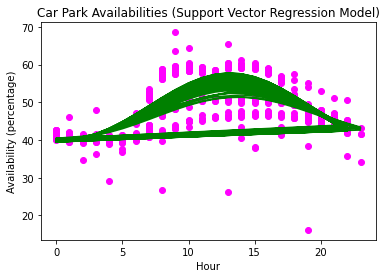

In [105]:
plt.scatter(X_train_arr[:, 0], y_train_arr[:, 0], color = 'magenta')
plt.plot(X_train_arr[:, 0], regressor.predict(X_train_arr), color = 'green')
plt.title('Car Park Availabilities (Support Vector Regression Model)')
plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')
plt.show()

In [106]:
X_test_arr = np.asarray(X_test).reshape(-1, 2)
X_test_arr

array([[0, 1],
       [1, 1],
       [2, 1],
       ...,
       [21, 31],
       [22, 31],
       [23, 31]], dtype=object)

In [107]:
y_test_arr = np.asarray(y_test).reshape(-1, 1)
y_test_arr

array([[40.93891861],
       [40.5545808 ],
       [40.0558044 ],
       [39.83572506],
       [39.71393391],
       [39.86636582],
       [42.05535773],
       [50.10374533],
       [55.88221086],
       [58.80737688],
       [59.17789385],
       [59.04063701],
       [57.56331639],
       [58.75385083],
       [59.96029299],
       [59.87276765],
       [58.7946629 ],
       [57.41703982],
       [53.12145361],
       [47.33884902],
       [44.62437286],
       [43.797714  ],
       [42.60111376],
       [41.2188349 ],
       [40.44849928],
       [39.83940135],
       [39.67915217],
       [39.64895148],
       [39.44979529],
       [39.63385476],
       [41.69265965],
       [49.54106375],
       [55.45477463],
       [58.60376551],
       [88.37209302],
       [58.94448175],
       [57.84212644],
       [58.99506052],
       [60.3172375 ],
       [60.31921599],
       [59.52943587],
       [58.40534853],
       [54.01651004],
       [48.07033378],
       [44.9822597 ],
       [44

In [108]:
predicted = regressor.predict(X_test_arr)

In [109]:
score = regressor.score(X_test,y_test)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_test, predicted))
# print("R2-score:", r2_score(y_test, predicted))

R-squared: 0.49818336313821165
MSE: 36.29108358712586


### Time series plot of the actual and predicted hourly values

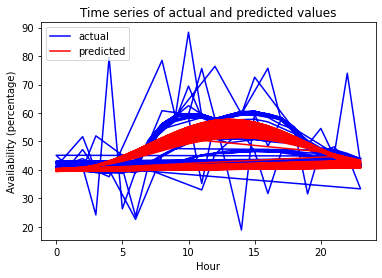

In [110]:
# Plotting the time series
plt.plot(X_test_arr[:, 0], y_test_arr[:, 0], "-b", label = "actual")
plt.plot(X_test_arr[:, 0], predicted, "-r", label = "predicted")

plt.title('Time series of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Scatter plot of actual vs predicted hourly values

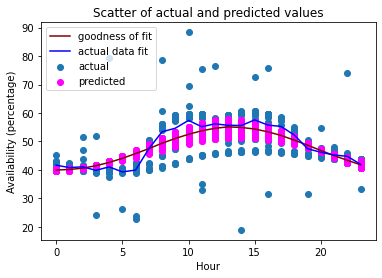

In [141]:
# Plotting
plt.scatter(X_test_arr[:, 0], y_test_arr[:, 0], label = "actual")
plt.scatter(X_test_arr[:, 0], predicted, color='magenta', label='predicted')

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], color = "maroon", label = "goodness of fit")
plt.plot(actual_agg['hour'], actual_agg['actual_val'], color = "blue", label = "actual data fit")

plt.title('Scatter of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

## Question 2.4

**Build a Decision tree (DT) model to forecast the hourly carpark availability for the month of August.**

Training data: July 2022
Test data: August 2022

The target is the hourly carpark availability percentage and you will have to decide what features you want to use.